In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("Advertising.csv")

In [4]:
dataset.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
dataset.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
dataset.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


here we can see that the sales depend on more than 1 factor( TV,RADIO,NEWSPAPER)
ie we cannot use basic regression 
multiple linear regression is better

In [11]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [12]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [13]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=3)

In [22]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[21.736 23.8  ]
 [16.457 16.6  ]
 [ 7.66   9.5  ]
 [17.892 14.8  ]
 [18.677 17.6  ]
 [23.863 25.5  ]
 [16.336 16.9  ]
 [13.456 12.9  ]
 [ 9.177 10.5  ]
 [17.361 17.1  ]
 [14.468 14.5  ]
 [ 9.857 11.3  ]
 [17.261 17.4  ]
 [16.719 16.7  ]
 [15.095 13.4  ]
 [15.589 15.9  ]
 [12.452 12.9  ]
 [17.279 12.8  ]
 [11.094  9.5  ]
 [18.069 18.4  ]
 [ 9.334 10.7  ]
 [12.913 12.5  ]
 [ 8.784  8.5  ]
 [10.467 11.5  ]
 [11.403 11.9  ]
 [15.031 14.9  ]
 [ 9.785 10.1  ]
 [19.46  18.9  ]
 [18.23  19.6  ]
 [17.196 15.9  ]
 [21.603 23.2  ]
 [14.719 11.9  ]
 [16.292 17.3  ]
 [12.364 11.7  ]
 [19.988 20.2  ]
 [15.376 15.5  ]
 [13.967 11.5  ]
 [10.068 11.   ]
 [20.972 22.3  ]
 [ 7.459  7.6  ]]


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [24]:
print(mse)
print(mae)
print(rmse)

1.9918855518287912
1.0402154012924727
1.411341755858159


In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8927605914615383


Since multiple linear regression model generates a 3d model ie not preferable in 2D.

R2 score nearly 90% ie model can be used

# Polynomial Regression


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[23.76 23.8 ]
 [16.19 16.6 ]
 [ 9.53  9.5 ]
 [14.93 14.8 ]
 [18.   17.6 ]
 [25.43 25.5 ]
 [16.59 16.9 ]
 [13.06 12.9 ]
 [10.47 10.5 ]
 [16.99 17.1 ]
 [14.38 14.5 ]
 [11.04 11.3 ]
 [17.08 17.4 ]
 [17.38 16.7 ]
 [13.44 13.4 ]
 [16.42 15.9 ]
 [12.88 12.9 ]
 [12.28 12.8 ]
 [ 8.23  9.5 ]
 [18.35 18.4 ]
 [10.88 10.7 ]
 [12.01 12.5 ]
 [ 8.05  8.5 ]
 [11.67 11.5 ]
 [12.15 11.9 ]
 [14.69 14.9 ]
 [ 9.85 10.1 ]
 [19.42 18.9 ]
 [19.58 19.6 ]
 [16.22 15.9 ]
 [23.05 23.2 ]
 [12.87 11.9 ]
 [17.27 17.3 ]
 [11.89 11.7 ]
 [20.24 20.2 ]
 [15.25 15.5 ]
 [11.77 11.5 ]
 [10.72 11.  ]
 [22.42 22.3 ]
 [ 6.8   7.6 ]]


In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [34]:
print(mse)
print(mae)
print(rmse)

0.15570512823341642
0.2871987392259662
0.39459489129158326


In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9916171258721033


r2 score 99% probably the best model

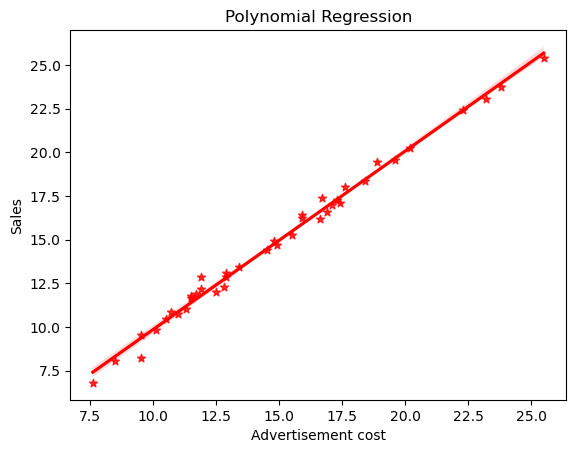

In [54]:
sns.regplot(x=y_test, y=y_pred, color="red",marker="*",label="best_fit_line")
plt.title('Polynomial Regression')
plt.ylabel('Sales')
plt.xlabel('Advertisement cost')
plt.show()


# Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 2)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=2)

In [65]:
y_pred2=regressor.predict(x_test)
y_pred2

array([22.89, 15.58,  9.53, 13.41, 15.79, 25.01, 18.1 , 14.53, 11.15,
       16.05, 14.87, 11.21, 16.7 , 15.04, 12.77, 15.6 , 13.14, 11.97,
        8.69, 17.4 , 10.33, 12.98,  7.67, 12.08, 11.98, 14.99, 10.09,
       18.98, 18.56, 15.57, 22.7 , 11.97, 17.19, 12.84, 20.14, 15.11,
       11.83, 11.41, 22.09,  7.4 ])

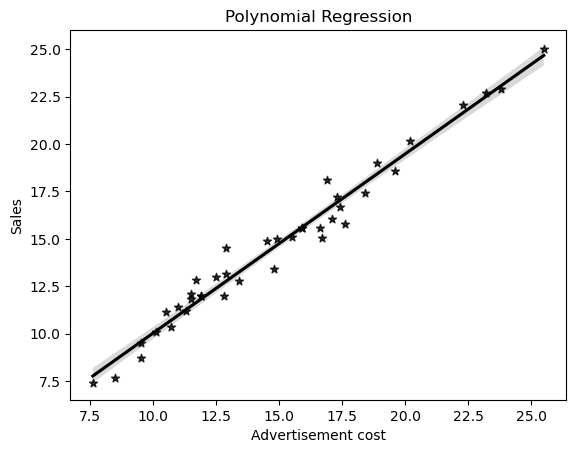

In [59]:
sns.regplot(x=y_test, y=y_pred2, color="black",marker="*",label="best_fit_line")
plt.title('Polynomial Regression')
plt.xlabel('Advertisement cost')
plt.ylabel('Sales')
plt.show()


In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred2)
mae=mean_absolute_error(y_test,y_pred2)
rmse=np.sqrt(mse)

In [61]:
print(mse)
print(mae)
print(rmse)

0.5976800000000015
0.603000000000001
0.7730976652402991


In [62]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
print(score)

0.9678220218845299


Random Forest Regression Model predicts results with R2 score of nearly 97%

Polynomial regression predicts results with nearly 99% R2 score ie it should be used